<a href="https://colab.research.google.com/github/jigarborad/ML-Vehicle-Detection/blob/main/VehicleDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
from PIL import Image
import cv2
import numpy as np

In [2]:
# reading the image
img = Image.open('cars.png')
img = img.resize((450,250))
img_arr = np.array(img)
img_arr

array([[[ 68,  77,  39],
        [ 67,  74,  38],
        [ 79,  84,  49],
        ...,
        [ 87,  90,  75],
        [101, 103,  92],
        [117, 118, 110]],

       [[ 77,  82,  43],
        [ 56,  60,  24],
        [ 62,  66,  32],
        ...,
        [ 72,  75,  58],
        [ 71,  74,  59],
        [ 83,  85,  73]],

       [[ 86,  85,  50],
        [ 70,  69,  37],
        [ 45,  46,  17],
        ...,
        [ 69,  72,  52],
        [ 72,  75,  57],
        [ 69,  72,  55]],

       ...,

       [[ 82,  82,  82],
        [ 80,  80,  80],
        [ 83,  83,  83],
        ...,
        [ 96,  98, 100],
        [111, 112, 115],
        [127, 128, 132]],

       [[ 83,  83,  83],
        [ 79,  79,  79],
        [ 85,  85,  85],
        ...,
        [102, 103, 105],
        [112, 113, 116],
        [129, 130, 134]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [103, 104, 106],
        [117, 118, 121],
        [131, 132, 136]]

In [3]:
# converted img into grayscale img to get better output
img_gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)

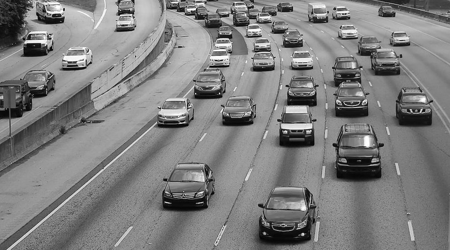

In [4]:
Image.fromarray(img_gray)

In [5]:
# blur the img to reduce the noise with gaussian filter
img_blur = cv2.GaussianBlur(img_gray,(5,5),0)

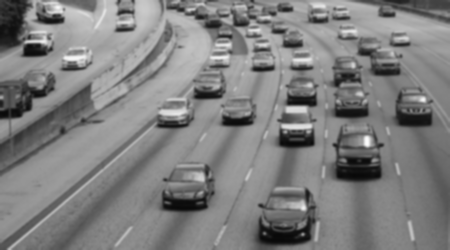

In [6]:
Image.fromarray(img_blur)

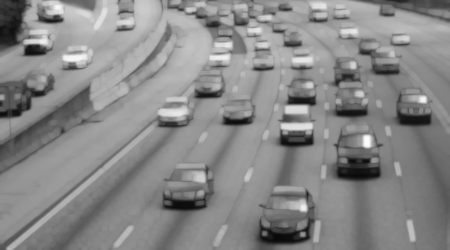

In [7]:
# dilate the image to increse white region and foreground object
img_dilated = cv2.dilate(img_blur, np.ones((3,3)))
Image.fromarray(img_dilated)

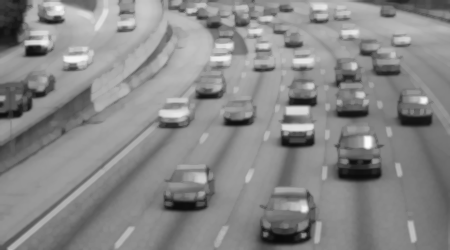

In [8]:
# Morpholy Transformation to get structer(shape) of objects in image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
closing = cv2.morphologyEx(img_dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [9]:
# getting haar cascading file for cars and using classification on it
car_cascade_xml = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_xml)
cars = car_cascade.detectMultiScale(closing,1.1,1)

22 cars found


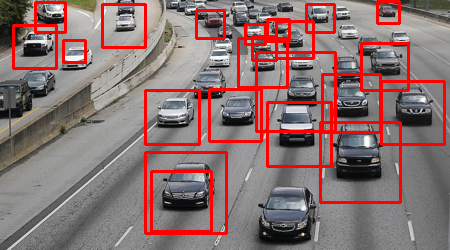

In [10]:
# making contours around detected cars
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(img_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, "cars found")
Image.fromarray(img_arr)

In [11]:
# now trying bus cascade to detect front of buses
bus_img = Image.open('bus.jpg')
bus_img = bus_img.resize((450,250))
bus_arr = np.array(bus_img)
bus_gray = cv2.cvtColor(bus_arr, cv2.COLOR_BGR2GRAY)

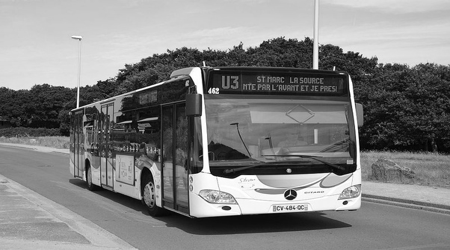

In [12]:
Image.fromarray(bus_gray)

In [13]:
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
buses = bus_cascade.detectMultiScale(bus_gray,1.1,1)

1 buses found


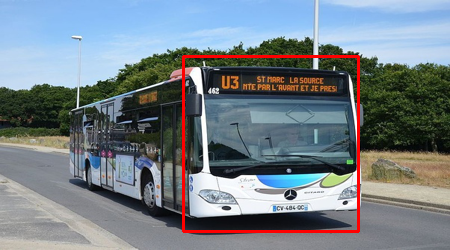

In [14]:
# making contours around detected bus
cnt = 0
for (x,y,w,h) in buses:
  cv2.rectangle(bus_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, "buses found")
Image.fromarray(bus_arr)

In [15]:
# Detecting cars from video file
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(car_cascade_xml)
frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))
video = cv2.VideoWriter('result2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 15, (frame_width,frame_height))

In [16]:
while True:
  ret, img_1 = cap.read()

  if (type(img_1)==type(None)):
    break
  else:
    gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray,1.1,2)

    for (x,y,w,h) in cars:
      cv2.rectangle(img_1,(x,y),(x+w,y+h),(255,0,0),2)
    video.write(img_1)

In [17]:
video.release()